### Importing libraries
Importing Libraries required for Project such **pandas**,**numpy**,**matplotlib**,**seaborn** and using
"**%matplotlib inline command**" - a magic command that allows the output of plotting commands to be displayed directly below the code cell that produced it

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Loading Dataset
I have [**IPL 2022 Dataset**](https://www.kaggle.com/datasets/aravindas01/ipl-2022dataset/data) from Kaggle in CSV format. The dataset was loaded into a DataFrame using the Pandas `read_csv()` function.

In [2]:
df=pd.read_csv('Book_ipl22_ver_33.csv')
df.head()

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,133,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,179,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,208,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,161,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,149,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22


### Column Overview (df.columns)
Here, I listed all the column names present in the DataFrame using the `columns` attribute.

In [3]:
df.columns

Index(['match_id', 'date', 'venue', 'team1', 'team2', 'stage', 'toss_winner',
       'toss_decision', 'first_ings_score', 'first_ings_wkts',
       'second_ings_score', 'second_ings_wkts', 'match_winner', 'won_by',
       'margin', 'player_of_the_match', 'top_scorer', 'highscore',
       'best_bowling', 'best_bowling_figure'],
      dtype='object')

### Dataset Information (df.info())
Here, I displayed a summary of the DataFrame, including data types, non-null counts, and memory usage using `df.info` method

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   match_id             74 non-null     int64 
 1   date                 74 non-null     object
 2   venue                74 non-null     object
 3   team1                74 non-null     object
 4   team2                74 non-null     object
 5   stage                74 non-null     object
 6   toss_winner          74 non-null     object
 7   toss_decision        74 non-null     object
 8   first_ings_score     74 non-null     int64 
 9   first_ings_wkts      74 non-null     int64 
 10  second_ings_score    74 non-null     int64 
 11  second_ings_wkts     74 non-null     int64 
 12  match_winner         74 non-null     object
 13  won_by               74 non-null     object
 14  margin               74 non-null     int64 
 15  player_of_the_match  74 non-null     object
 16  top_scorer

### Summary Statistics (df.describe())
Here,I generated summary statistics for the numeric columns in the DataFrame using the `describe()` method.

In [5]:
df.describe()

,match_id,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,margin,highscore
count,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000
mean,37.500000,171.121622,6.135135,158.540541,6.175676,16.972973,71.716216
std,21.505813,29.048355,2.222699,29.299207,2.639832,19.651047,20.705052
min,1.000000,68.000000,0.000000,72.000000,1.000000,2.000000,28.000000
25%,19.250000,154.250000,5.000000,142.750000,4.000000,5.250000,57.000000
50%,37.500000,169.500000,6.000000,160.000000,6.000000,8.000000,68.000000
75%,55.750000,192.750000,8.000000,176.000000,8.000000,18.000000,87.750000
max,74.000000,222.000000,10.000000,211.000000,10.000000,91.000000,140.000000


In [6]:
for entries in df.columns:
    if df[entries].isnull().sum() > 0:
        print(f"Column '{entries}' has {df[entries].isnull().sum()} missing values.")

# General Overview:


In [7]:
ipl_teams_colors = {
    "Chennai": "#FFC300",  # Yellow
    "Delhi": "#0070C0",  # Sky Blue
    "Gujarat": "#12A4D9",  # Teal
    "Kolkata": "#5D23A2",  # Purple
    "Lucknow": "#1AB7EA",  # Turquoise
    "Mumbai": "#001B43",  # Navy Blue
    "Punjab": "#DA2C2C",  # Red
    "Rajasthan": "#FFC0CB",  # Pink
    "Banglore": "#9D0000",  # Red
    "Hyderabad": "#F1804F",  # Orange
}

c=["#b33dc6",  "#27aeef", "#87bc45", "#bdcf32", "#ede15b", "#edbf33"]

### Total number of matches played in IPL 2022?

In [8]:
print(f"Total Number of matched played is {df['match_id'].max()}")

Total Number of matched played is 74


### List of Venues where matches was played

In [9]:
for entries in sorted(df['venue'].unique()):
    print(f"{entries}")

Brabourne Stadium, Mumbai
Dr DY Patil Sports Academy, Mumbai
Eden Gardens, Kolkata
Maharashtra Cricket Association Stadium,Pune
Narendra Modi Stadium, Ahmedabad
Wankhede Stadium, Mumbai


### List of Team Played in IPL 2022

In [10]:
for entries in sorted(df[['team2','team1']].stack().unique()):
    print(f"{entries}")

Banglore
Chennai
Delhi
Gujarat
Hyderabad
Kolkata
Lucknow
Mumbai
Punjab
Rajasthan


### Analysis: Number of Matches Played in Each Venue

venue
Wankhede Stadium, Mumbai                        21
Dr DY Patil Sports Academy, Mumbai              20
Brabourne Stadium, Mumbai                       16
Maharashtra Cricket Association Stadium,Pune    13
Eden Gardens, Kolkata                            2
Narendra Modi Stadium, Ahmedabad                 2
Name: count, dtype: int64

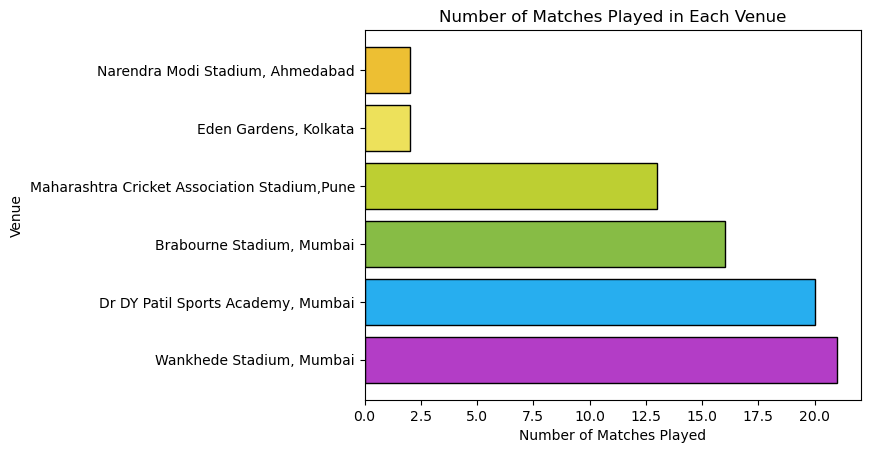

In [11]:
matchsplayed=df['venue'].value_counts()


plt.barh(matchsplayed.index, matchsplayed.values,color=c,edgecolor='black')

plt.ylabel('Venue')
plt.xlabel('Number of Matches Played')
plt.title('Number of Matches Played in Each Venue')
matchsplayed


### Analysis: Number of Matches Played By Each Team

Banglore     16
Chennai      14
Delhi        14
Gujarat      16
Hyderabad    14
Kolkata      14
Lucknow      15
Mumbai       14
Punjab       14
Rajasthan    17
Name: count, dtype: int64

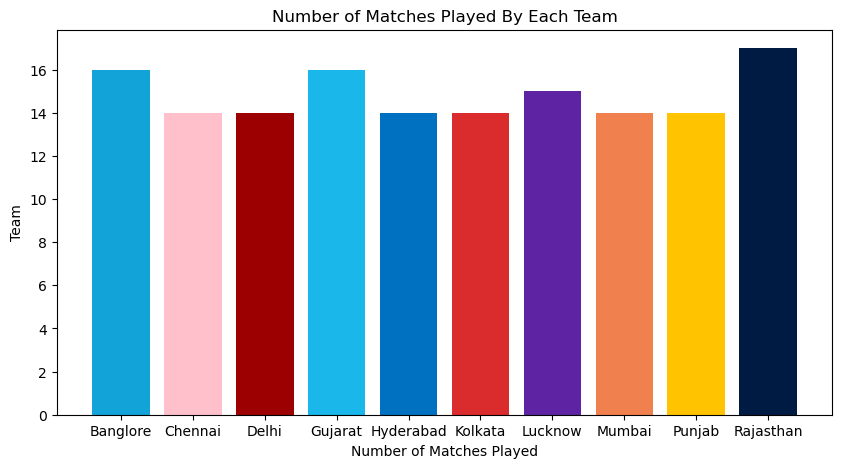

In [12]:
df['match_lost'] = df.apply(lambda row: row['team2'] if row['team1'] == row['match_winner'] else row['team1'], axis=1)
matchswon=df['match_winner'].value_counts()
matchslost=df['match_lost'].value_counts()
plt.figure(figsize=(10, 5))
TotalMatchPlayed=matchswon+matchslost
colors=[ipl_teams_colors[team] for team in matchswon.index]
plt.bar( TotalMatchPlayed.index,TotalMatchPlayed.values,color=colors)
plt.ylabel('Team')
plt.xlabel('Number of Matches Played')
plt.title('Number of Matches Played By Each Team')
TotalMatchPlayed

# Toss Analysis

### Percentage of teams chose to bat first after winning the toss

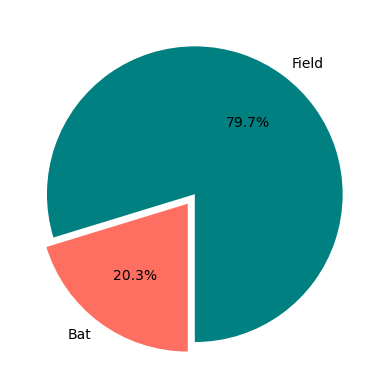

In [51]:
tossdecision=df['toss_decision'].value_counts()
explode=[0,0.08]
color=["#008080","#ff6f61"]
plt.pie(tossdecision.values,labels=tossdecision.index,startangle=270,autopct='%1.1f%%',explode=explode,colors=color)
plt.show()

### Analysis: Toss Won by Each Team

,count
toss_winner,
Gujarat,10
Hyderabad,10
Mumbai,9
Kolkata,8
Delhi,8
Banglore,8
Lucknow,7
Chennai,6
Punjab,4


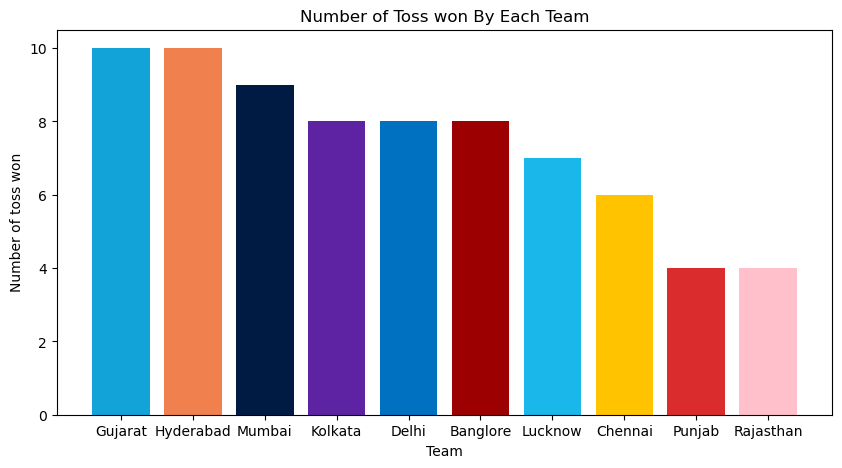

In [14]:
ipl_df=df.copy()
tosswoncount=ipl_df['toss_winner'].value_counts()
colors=[ipl_teams_colors[team] for team in tosswoncount.index]
plt.figure(figsize=(10, 5))
plt.bar( tosswoncount.index,tosswoncount.values,color=colors)
plt.xlabel('Team')
plt.ylabel('Number of toss won')
plt.title('Number of Toss won By Each Team')
display(tosswoncount.to_frame())

### Analysis: Tosses vs Matches in IPL Teams

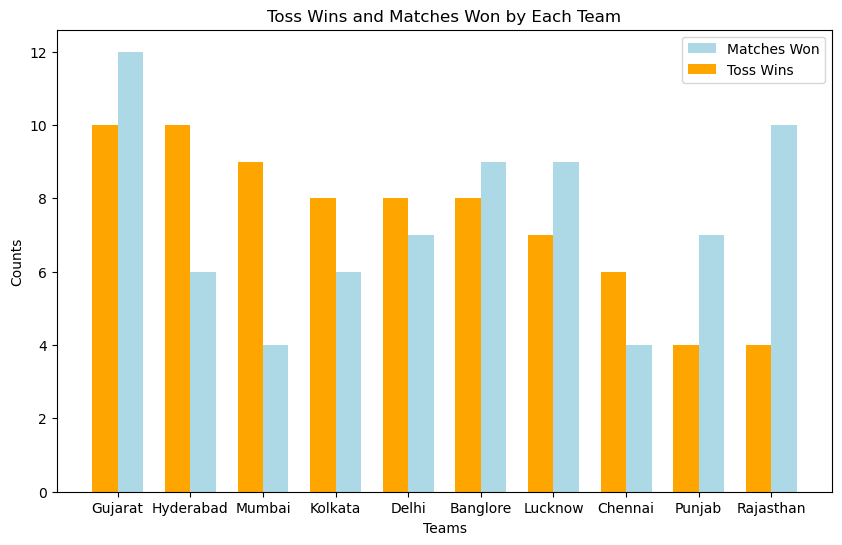

In [59]:


plt.figure(figsize=(10, 6))
bar_width = 0.35

# Create numerical indices for the bar graph
indices = np.arange(len(merged_df))

# Create a bar graph with two values

plt.bar(indices + bar_width/2, merged_df['Total_Match_won'].astype(float), bar_width, color='lightblue', label='Matches Won')
plt.bar(indices - bar_width/2, merged_df['Total_Toss_won'].astype(float), bar_width, color='orange', label='Toss Wins')

# Add labels and title
plt.xlabel('Teams')
plt.ylabel('Counts')
plt.title('Toss Wins and Matches Won by Each Team')

# Set x-axis ticks and labels
plt.xticks(indices, merged_df.index)

# Show legend
plt.legend()

# Show the plot
plt.show()


### Analysis: Matches Won by Teams Winning the Toss at Each Stadium


,count
venue,
"Wankhede Stadium, Mumbai",11
"Dr DY Patil Sports Academy, Mumbai",11
"Brabourne Stadium, Mumbai",7
"Maharashtra Cricket Association Stadium,Pune",5
"Eden Gardens, Kolkata",1
"Narendra Modi Stadium, Ahmedabad",1


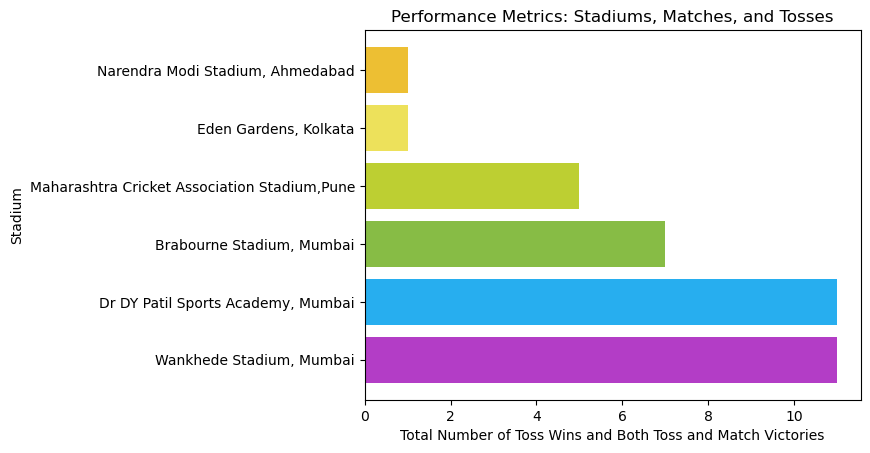

In [15]:
iplvenue_df=df[['venue','toss_winner','match_winner']].copy()
iplvenue_df['Toss_and_winner_count']=(ipl_df['toss_winner']==ipl_df['match_winner']).astype(int)
venue_tossandmatchwon=iplvenue_df[iplvenue_df['Toss_and_winner_count'] == 1]
venue_tossandmatchwon=venue_tossandmatchwon['venue'].value_counts()


plt.barh( venue_tossandmatchwon.index,venue_tossandmatchwon.values,color=c)
plt.ylabel('Stadium')
plt.xlabel('Total Number of Toss Wins and Both Toss and Match Victories')
plt.title('Performance Metrics: Stadiums, Matches, and Tosses')
venue_tossandmatchwon.to_frame()



### Correlation Between the Total Number of Toss Wins and Both Toss and Match Victories

In [58]:
ipltoss_df=df[['venue','toss_winner','match_winner']].copy()

ipltoss_df['Toss_and_winner_count']=(ipl_df['toss_winner']==ipl_df['match_winner']).astype(int)
tossandmatchwon=ipltoss_df[ipltoss_df['Toss_and_winner_count'] == 1]
tossandmatchwoncount=tossandmatchwon['toss_winner'].value_counts()
tossandmatchwoncount.to_frame()
merged_df = pd.merge(tosswoncount, tossandmatchwoncount, on='toss_winner')
merged_df = merged_df.merge(matchswon.to_frame(), left_index=True, right_index=True)
merged_df.rename(columns={'count_x':'Total_Toss_won','count_y':'Total_Toss_and_Match_Won', \
                          'count':'Total_Match_won'}, inplace=True)
merged_df['Total_Toss_and_Match_lost']=merged_df['Total_Toss_won']-merged_df['Total_Toss_and_Match_Won']

merged_df

,Total_Toss_won,Total_Toss_and_Match_Won,Total_Match_won,Total_Toss_and_Match_lost
Gujarat,10,7,12,3
Hyderabad,10,5,6,5
Mumbai,9,3,4,6
Kolkata,8,5,6,3
Delhi,8,4,7,4
Banglore,8,4,9,4
Lucknow,7,4,9,3
Chennai,6,1,4,5
Punjab,4,1,7,3
Rajasthan,4,2,10,2


In [17]:
correlationofwinning = merged_df['Total_Toss_won'].corr(merged_df['Total_Toss_and_Match_Won'])
print(f"Correlation Between the Total Number of Toss Wins and Both Toss and Match Victories is {correlationofwinning:.2f}")

Correlation Between the Total Number of Toss Wins and Both Toss and Match Victories is 0.83
